In [1]:
# 匯入資料
from sklearn import datasets
wine = datasets.load_wine()
wine.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names'])

In [3]:
wine['feature_names'], len(wine['feature_names'])

(['alcohol',
  'malic_acid',
  'ash',
  'alcalinity_of_ash',
  'magnesium',
  'total_phenols',
  'flavanoids',
  'nonflavanoid_phenols',
  'proanthocyanins',
  'color_intensity',
  'hue',
  'od280/od315_of_diluted_wines',
  'proline'],
 13)

In [7]:
#X 前面四個欄位的數值 #y 最後一個欄位的數值
# X, y = data.iloc[:, 1:-1].values, data.iloc[:, -1].values
X, y = wine['data'], wine['target']

In [10]:
X[:3], y[:3], X.shape

(array([[1.423e+01, 1.710e+00, 2.430e+00, 1.560e+01, 1.270e+02, 2.800e+00,
         3.060e+00, 2.800e-01, 2.290e+00, 5.640e+00, 1.040e+00, 3.920e+00,
         1.065e+03],
        [1.320e+01, 1.780e+00, 2.140e+00, 1.120e+01, 1.000e+02, 2.650e+00,
         2.760e+00, 2.600e-01, 1.280e+00, 4.380e+00, 1.050e+00, 3.400e+00,
         1.050e+03],
        [1.316e+01, 2.360e+00, 2.670e+00, 1.860e+01, 1.010e+02, 2.800e+00,
         3.240e+00, 3.000e-01, 2.810e+00, 5.680e+00, 1.030e+00, 3.170e+00,
         1.185e+03]]),
 array([0, 0, 0]),
 (178, 13))

In [11]:
# 濃縮特徵
# sklearn.decomposition.PCA
from sklearn.decomposition import PCA
pca = PCA(n_components = 10)
X_pca = pca.fit_transform(X)

In [14]:
X_pca[:3], X_pca.shape

(array([[ 3.18562979e+02,  2.14921307e+01,  3.13073470e+00,
         -2.50113758e-01,  6.77078222e-01,  5.68081040e-01,
         -6.19641832e-01, -1.99555377e-01,  7.01280283e-01,
         -9.50075663e-02],
        [ 3.03097420e+02, -5.36471768e+00,  6.82283550e+00,
         -8.64034749e-01, -4.86095978e-01,  1.43398712e-02,
          1.08865121e-01,  6.04714449e-01,  2.86716849e-01,
         -4.57819758e-02],
        [ 4.38061133e+02, -6.53730945e+00, -1.11322298e+00,
          9.12410681e-01,  3.80651426e-01,  6.72403748e-01,
          7.85818858e-01, -5.00885700e-01,  2.45466567e-02,
         -2.08959774e-01]]),
 (178, 10))

In [15]:
# 分割全部數據成為 訓練與驗證資料區 # sklearn.model_selection.train_test_split 
# https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=0)

In [16]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((142, 10), (36, 10), (142,), (36,))

In [17]:
## https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html#sklearn.neural_network.MLPClassifier
# 換成 MLPClassifier
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()
model.fit(X_train, y_train) 

RandomForestClassifier()

In [18]:
model.predict(X_test), y_test # score model

(array([0, 2, 1, 0, 1, 1, 0, 2, 1, 1, 2, 2, 0, 1, 2, 1, 0, 0, 1, 0, 1, 0,
        1, 1, 1, 1, 1, 1, 1, 2, 0, 0, 1, 0, 0, 0]),
 array([0, 2, 1, 0, 1, 1, 0, 2, 1, 1, 2, 2, 0, 1, 2, 1, 0, 0, 1, 0, 1, 0,
        0, 1, 1, 1, 1, 1, 1, 2, 0, 0, 1, 0, 0, 0]))

In [19]:
model.score(X_test, y_test) 

0.9722222222222222

In [ ]:
'''
13 :
12 :
11 :
10 : 0.9722222222222222
 9 :
 8
 7
 
 
 1 :
'''

In [33]:
# 跑一下迴圈 訓練在 
# n_components = 1 - 13
# 精準度的變化

from sklearn import datasets
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
    
wine = datasets.load_wine()
X, y = wine['data'], wine['target']
scores = []
# 3 --> 14
for i in range(1, 14):
    
    pca = PCA(n_components = i)
    X_pca = pca.fit_transform(X)

    X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=0)

    model = RandomForestClassifier()
    model.fit(X_train, y_train) 

    scores.append( (i, model.score(X_test, y_test)) )
    

In [34]:
scores

[(1, 0.6944444444444444),
 (2, 0.7777777777777778),
 (3, 0.9166666666666666),
 (4, 0.9722222222222222),
 (5, 0.9722222222222222),
 (6, 0.9444444444444444),
 (7, 0.9722222222222222),
 (8, 0.9722222222222222),
 (9, 0.9444444444444444),
 (10, 0.9722222222222222),
 (11, 0.9722222222222222),
 (12, 0.9444444444444444),
 (13, 0.9722222222222222)]

In [40]:
[s[0] for s in scores]

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13]

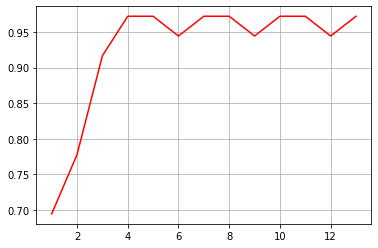

In [35]:
import matplotlib.pyplot as plt
plt.plot([s[0] for s in scores],  [s[1] for s in scores], color = 'red')
plt.grid()
plt.show()